In [1]:
import numpy as np
import hist

%load_ext autoreload
%autoreload 2

In [2]:
arrays_file = "/home/users/woodson/HH4b/plots/PostProcess/24June19Pt300250VBFRun3SaveArrays/fom_bin1_abcd_mass105-150_fom_arrays.npz"

In [3]:
with np.load(arrays_file) as f:
    all_fom = f["all_fom"]
    all_s = f["all_s"]
    all_b = f["all_b"]
    all_b_unc = f["all_b_unc"]
    all_sideband_events = f["all_sideband_events"]
    all_bdt_cuts = f["all_bdt_cuts"]
    all_xbb_cuts = f["all_xbb_cuts"]

In [4]:
bdt_cuts = np.sort(np.unique(all_bdt_cuts))
xbb_cuts = np.sort(np.unique(all_xbb_cuts))

bdt_cuts = np.array([bdt_cut for bdt_cut in bdt_cuts if bdt_cut >= 0.9])
xbb_cuts = np.array([xbb_cut for xbb_cut in xbb_cuts if xbb_cut >= 0.9])

print(xbb_cuts)

[0.9025 0.905  0.9075 0.91   0.9125 0.915  0.9175 0.92   0.9225 0.925
 0.9275 0.93   0.9325 0.935  0.9375 0.94   0.9425 0.945  0.9475 0.95
 0.9525 0.955  0.9575 0.96   0.9625 0.965  0.9675 0.97   0.9725 0.975
 0.9775 0.98   0.9825 0.985  0.9875 0.99   0.9925 0.995  0.9975]


In [5]:
h_sb = hist.Hist(
    hist.axis.Variable(list(bdt_cuts) + [1.0], name="bdt_cut"),
    hist.axis.Variable(list(xbb_cuts) + [1.0], name="xbb_cut"),
)

h_b = hist.Hist(
    hist.axis.Variable(list(bdt_cuts) + [1.0], name="bdt_cut"),
    hist.axis.Variable(list(xbb_cuts) + [1.0], name="xbb_cut"),
)

h_s = hist.Hist(
    hist.axis.Variable(list(bdt_cuts) + [1.0], name="bdt_cut"),
    hist.axis.Variable(list(xbb_cuts) + [1.0], name="xbb_cut"),
)

h_b_unc = hist.Hist(
    hist.axis.Variable(list(bdt_cuts) + [1.0], name="bdt_cut"),
    hist.axis.Variable(list(xbb_cuts) + [1.0], name="xbb_cut"),
)

h_sideband = hist.Hist(
    hist.axis.Variable(list(bdt_cuts) + [1.0], name="bdt_cut"),
    hist.axis.Variable(list(xbb_cuts) + [1.0], name="xbb_cut"),
)

In [6]:
for xbb_cut in xbb_cuts:
    for bdt_cut in bdt_cuts:
        # find index of this cut
        idx = np.where((all_bdt_cuts == bdt_cut) & (all_xbb_cuts == xbb_cut))[0][0]
        if all_s[idx] > 0.25 and all_b[idx] >= 1 and all_sideband_events[idx] >= 6:
            h_sb.fill(bdt_cut, xbb_cut, weight=all_fom[idx])
            h_b.fill(bdt_cut, xbb_cut, weight=all_b[idx])
            h_b_unc.fill(bdt_cut, xbb_cut, weight=all_b_unc[idx])
            h_sideband.fill(bdt_cut, xbb_cut, weight=all_sideband_events[idx])
            h_s.fill(bdt_cut, xbb_cut, weight=all_s[idx])

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import mplhep as hep
from tqdm import tqdm

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))

mpl.rcParams["font.size"] = 30
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["grid.color"] = "#CCCCCC"
mpl.rcParams["grid.linewidth"] = 0.5
mpl.rcParams["figure.dpi"] = 400
mpl.rcParams["figure.edgecolor"] = "none"

plt.style.use(hep.style.CMS)
hep.style.use("CMS")


def plot_fom(h_sb, plot_dir, name="figofmerit", show=False, fontsize=3.5, label="Fig Of Merit"):
    """Plot FoM scan"""

    eff, bins_x, bins_y = h_sb.to_numpy()
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    plt.rcParams.update({"font.size": 18})

    cbar = hep.hist2dplot(
        h_sb, ax=ax, cmin=np.min(eff[eff > 0]) * 0.75, cmax=np.max(eff[eff > 0]) * 1.25, flow="none"
    )
    cbar.cbar.set_label(label, size=18)
    cbar.cbar.ax.get_yaxis().labelpad = 15
    for i in tqdm(range(len(bins_x) - 1)):
        for j in range(len(bins_y) - 1):
            if eff[i, j] > 0:
                ax.text(
                    (bins_x[i] + bins_x[i + 1]) / 2,
                    (bins_y[j] + bins_y[j + 1]) / 2,
                    eff[i, j].round(2),
                    color="black",
                    ha="center",
                    va="center",
                    fontsize=fontsize,
                )

    ax.set_xlabel("BDT Cut")
    ax.set_ylabel(r"$T_{Xbb}$ Cut")
    ax.set_ylim(bins_y[0], bins_y[-1])
    ax.set_xlim(bins_x[0], bins_x[-1])
    fig.tight_layout()
    plt.savefig(f"{plot_dir}/{name}.png", bbox_inches="tight")
    plt.savefig(f"{plot_dir}/{name}.pdf", bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

100%|██████████| 39/39 [00:00<00:00, 89.76it/s]


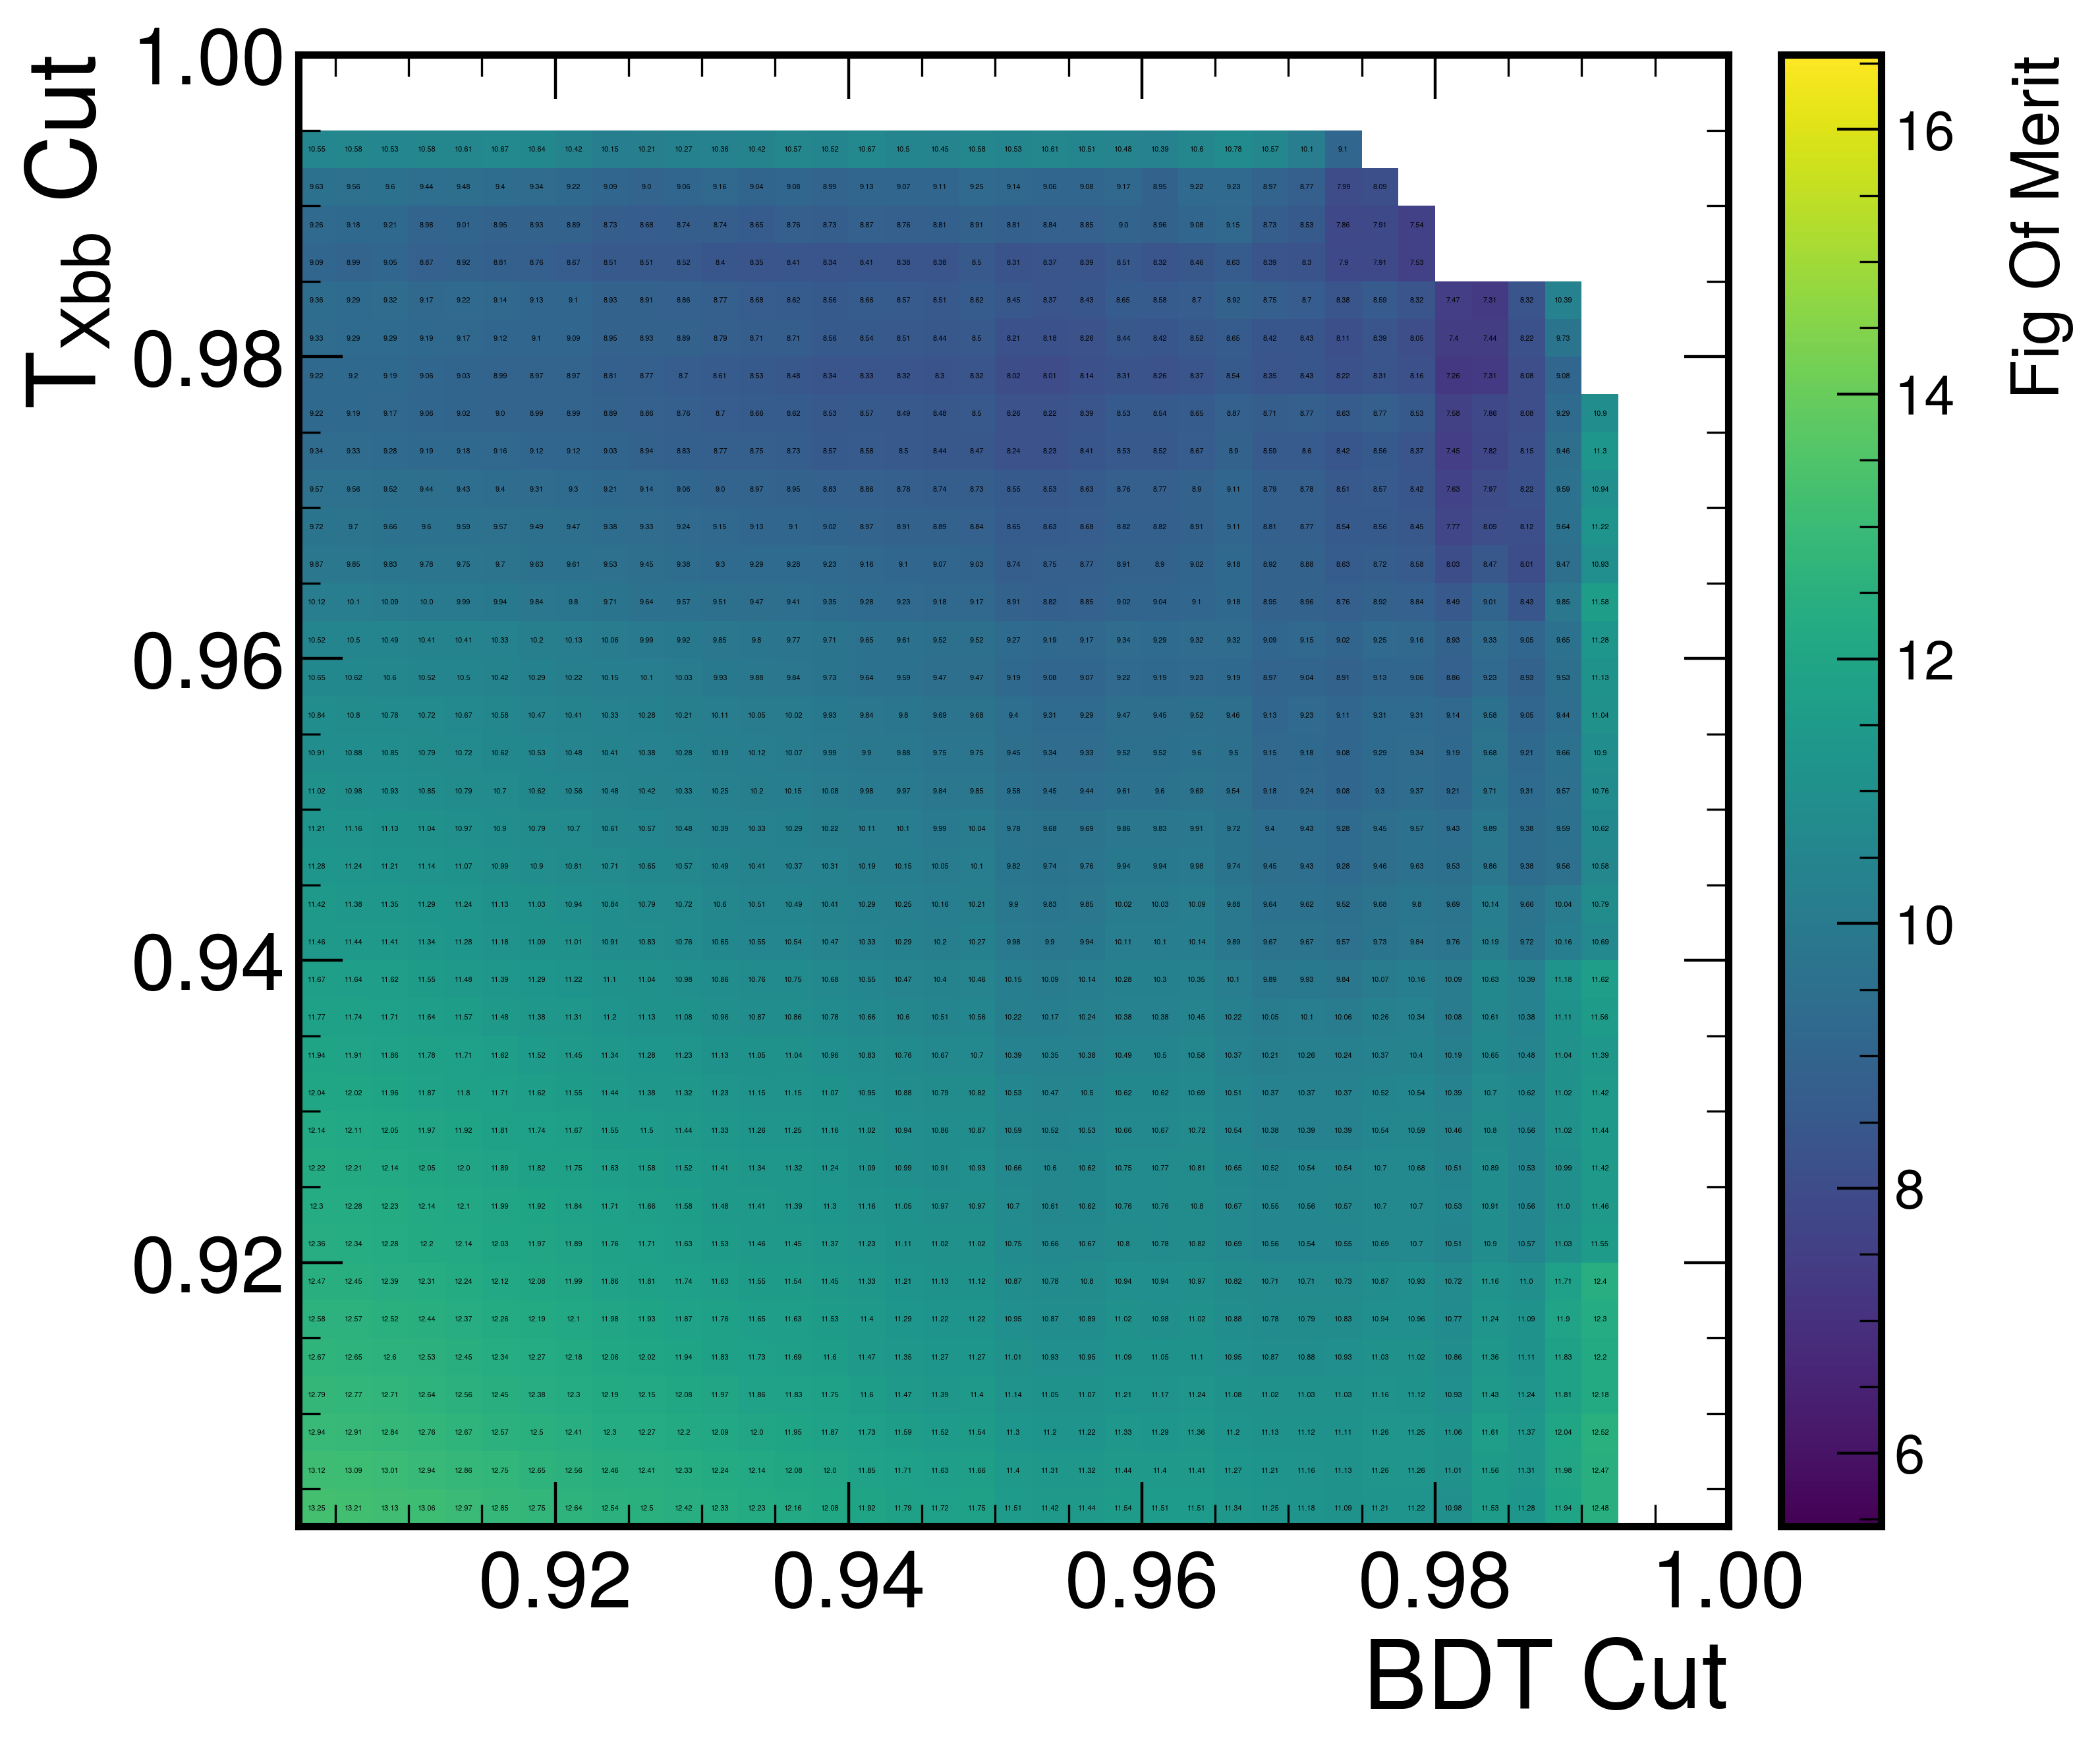

100%|██████████| 39/39 [00:00<00:00, 85.64it/s] 


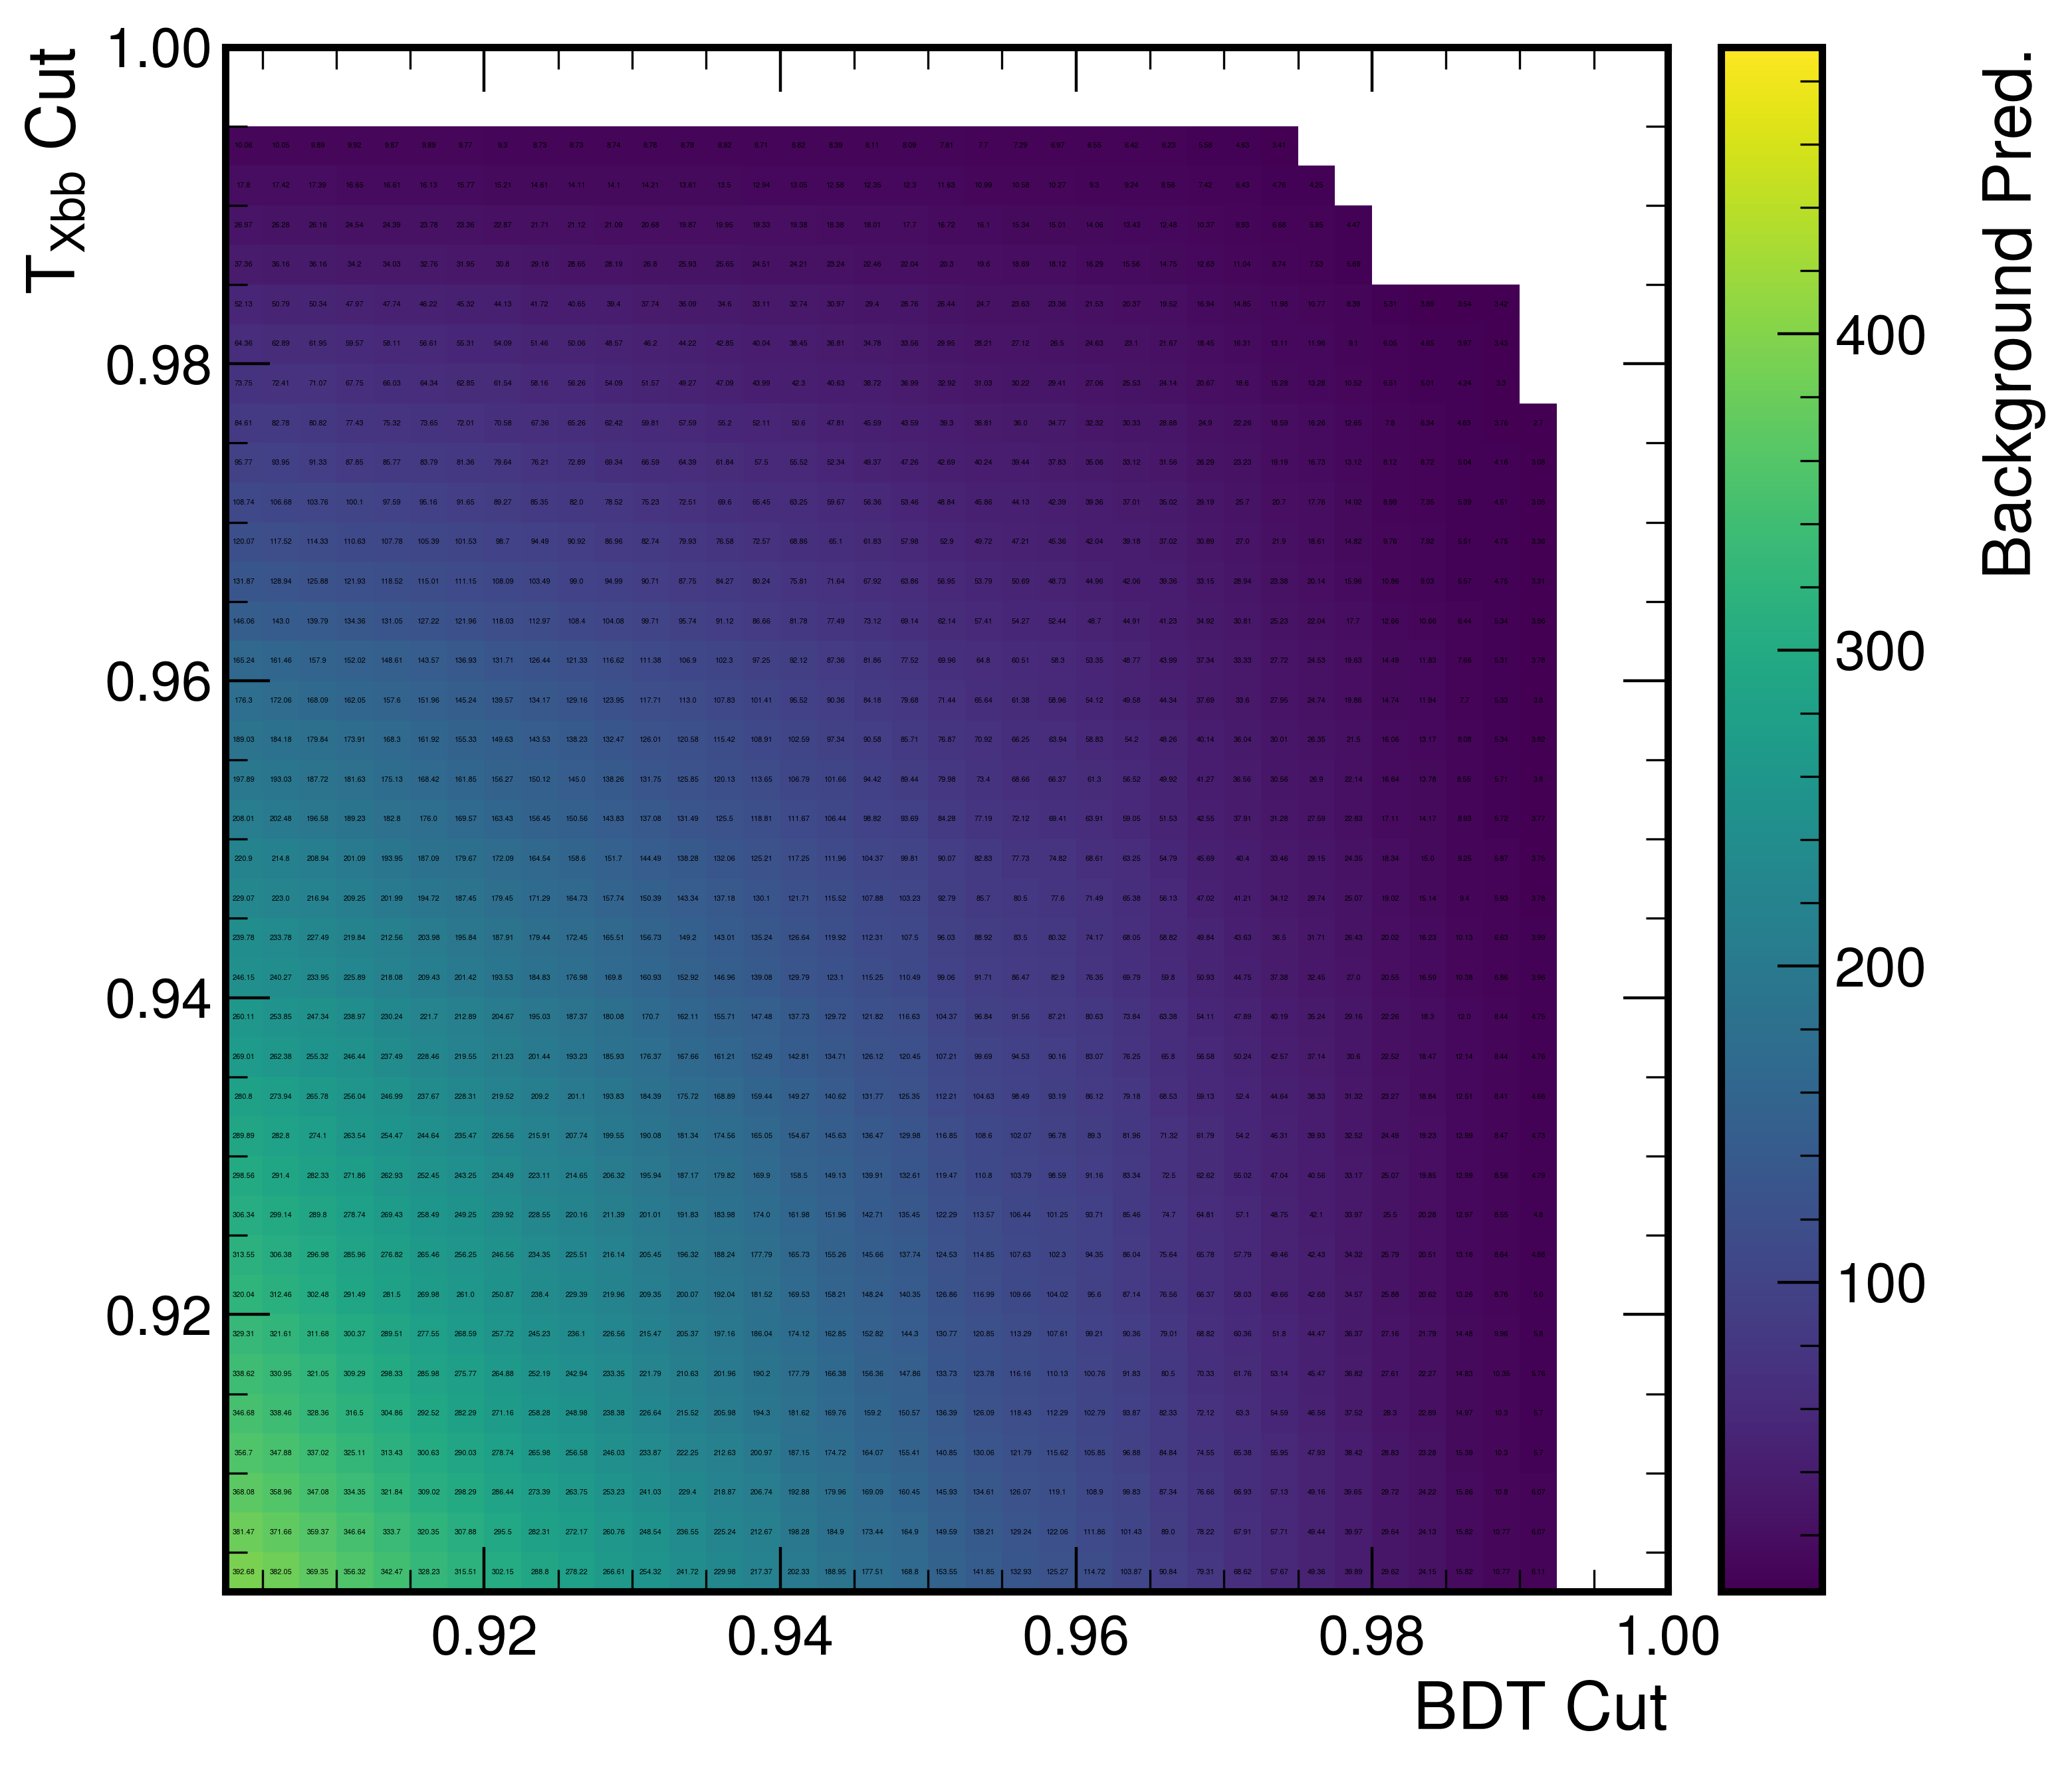

100%|██████████| 39/39 [00:00<00:00, 87.02it/s]


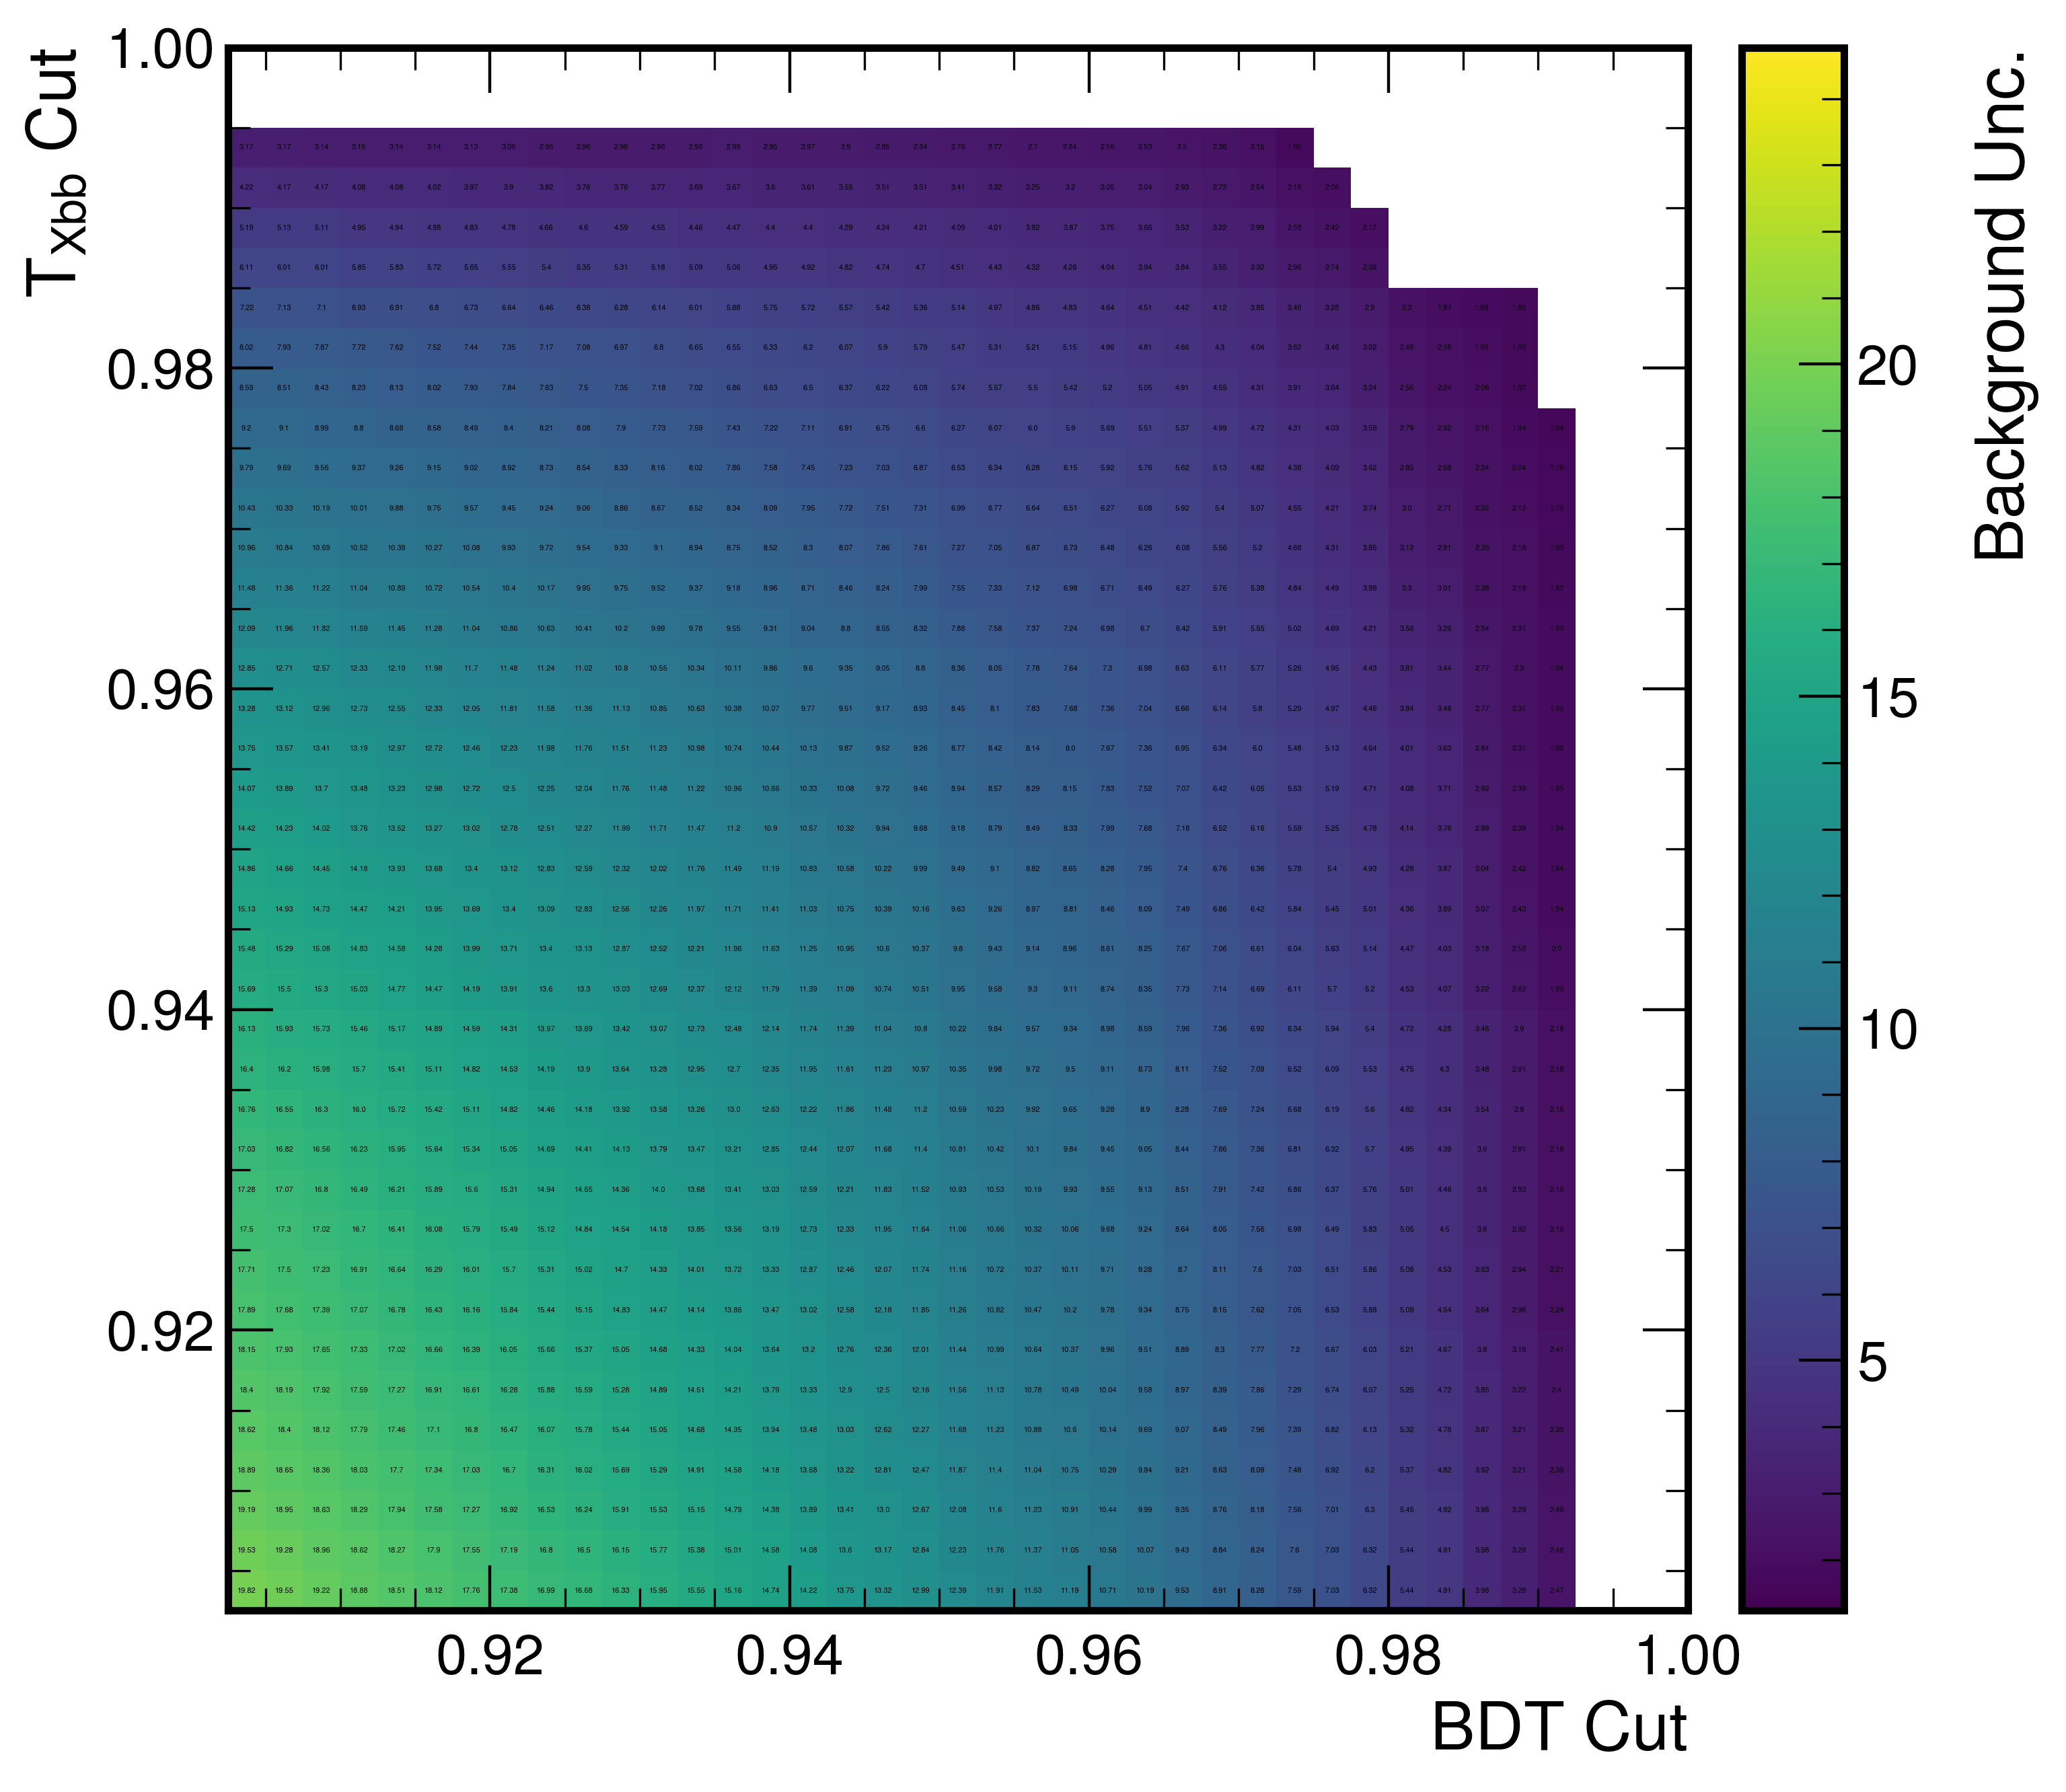

100%|██████████| 39/39 [00:00<00:00, 82.12it/s] 


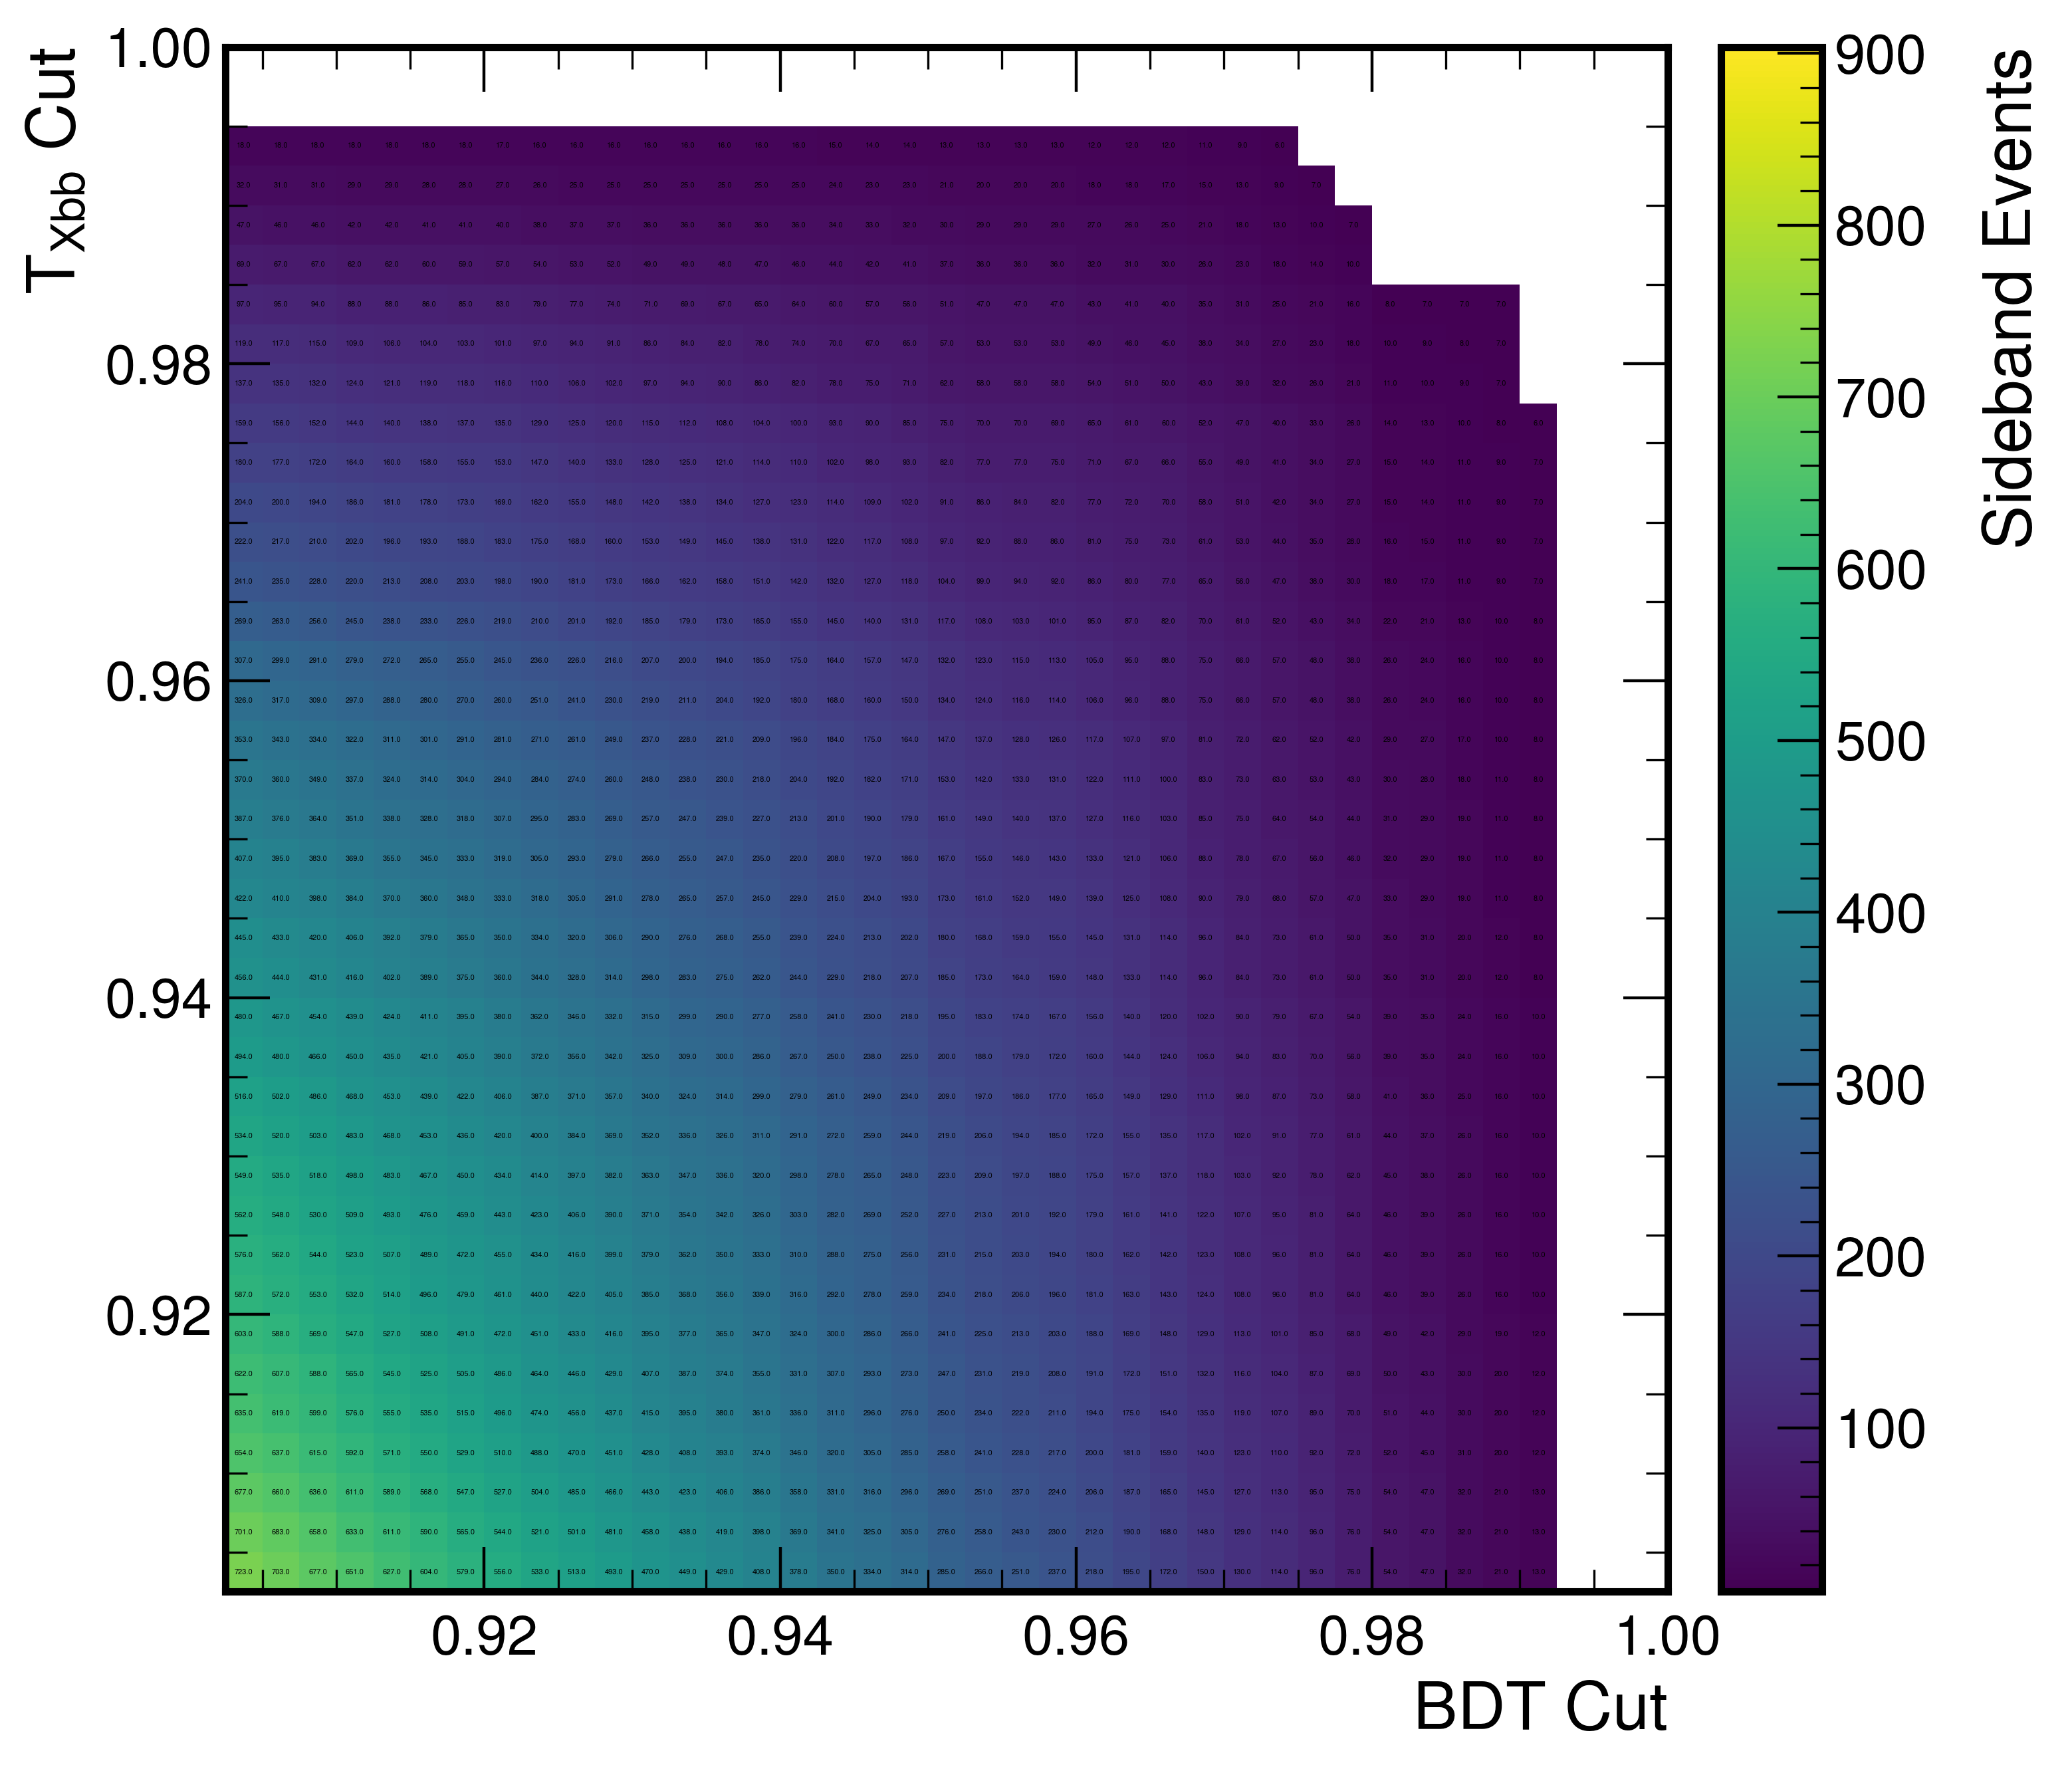

100%|██████████| 39/39 [00:00<00:00, 84.53it/s]


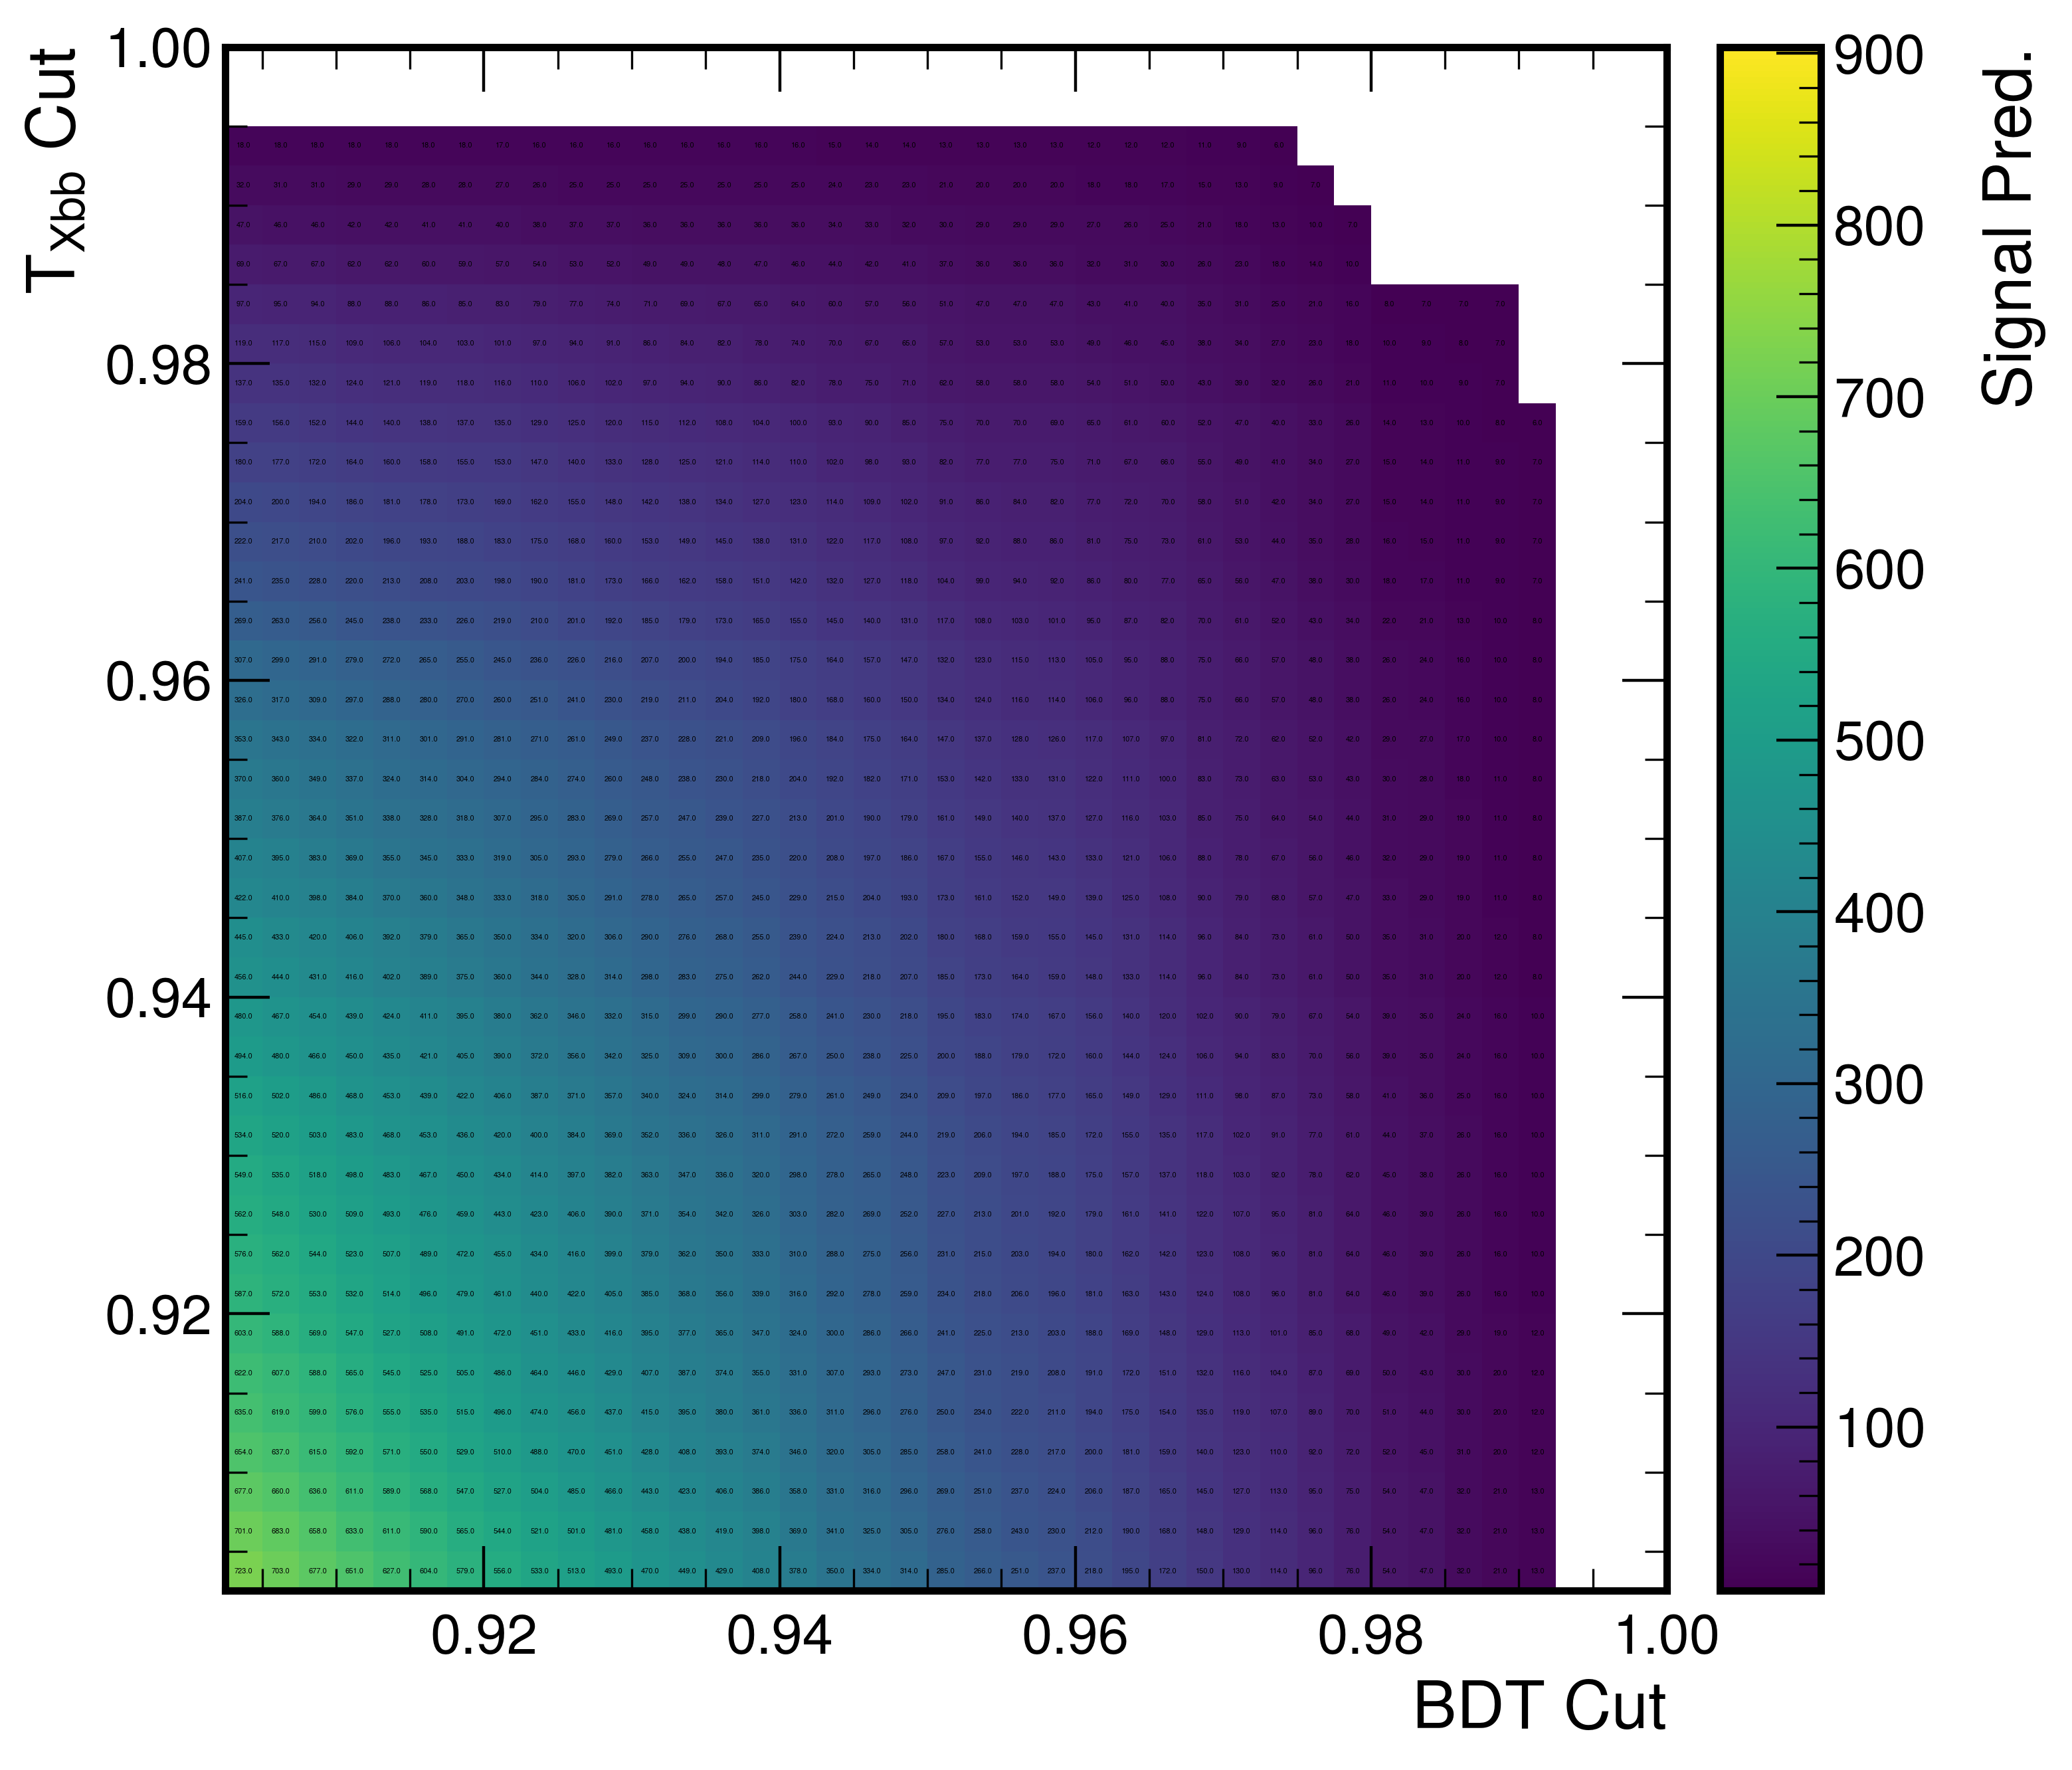

In [13]:
plot_dir = "."
name = f"fom_bin1_abcd_mass105-110"
plot_fom(h_sb, plot_dir, name=name, fontsize=2.0, show=True, label="Fig Of Merit")
plot_fom(h_b, plot_dir, name=f"{name}_bkg", fontsize=2.0, show=True, label="Background Pred.")
plot_fom(h_b_unc, plot_dir, name=f"{name}_bkgunc", fontsize=2.0, show=True, label="Background Unc.")
plot_fom(
    h_sideband, plot_dir, name=f"{name}_sideband", fontsize=2.0, show=True, label="Sideband Events"
)
plot_fom(h_sideband, plot_dir, name=f"{name}_signal", fontsize=2.0, show=True, label="Signal Pred.")